In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Decision Trees/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [4]:
#Consider 10K and above  Unit sales as high and rest low

In [5]:
#Creating new variable in dataset which satisfied income criteria and labeling it
data["Y"] = np.where(data['Sales']>= 10, 'High', 'Low') 
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Y
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [6]:
#Converting categorical values into numeric values
le=preprocessing.LabelEncoder()
data["Y"]=le.fit_transform(data["Y"])
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data['Urban']=le.fit_transform(data['Urban'])
data['US']=le.fit_transform(data["US"])

In [7]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Y
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [8]:
#Input variables
x=data.iloc[:,1:11]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [9]:
#Target variable
y=data.iloc[:,11]
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Y, dtype: int32

In [10]:
data["Y"].unique()

array([1, 0])

In [11]:
data.Y.value_counts()

1    321
0     79
Name: Y, dtype: int64

In [12]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=40)

In [13]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[5] <= 1.5\nentropy = 0.696\nsamples = 80\nvalue = [15, 65]'),
 Text(66.96000000000001, 135.9, 'X[5] <= 0.5\nentropy = 0.952\nsamples = 35\nvalue = [13, 22]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(100.44000000000001, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(267.84000000000003, 135.9, 'X[6] <= 38.5\nentropy = 0.262\nsamples = 45\nvalue = [2, 43]'),
 Text(234.36, 81.53999999999999, 'X[1] <= 57.0\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(301.32000000000005, 81.5

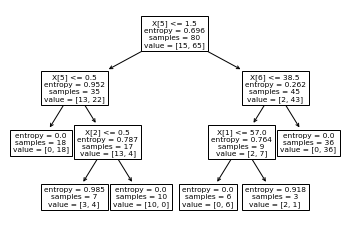

In [14]:
#PLot the decision tree
tree.plot_tree(model)

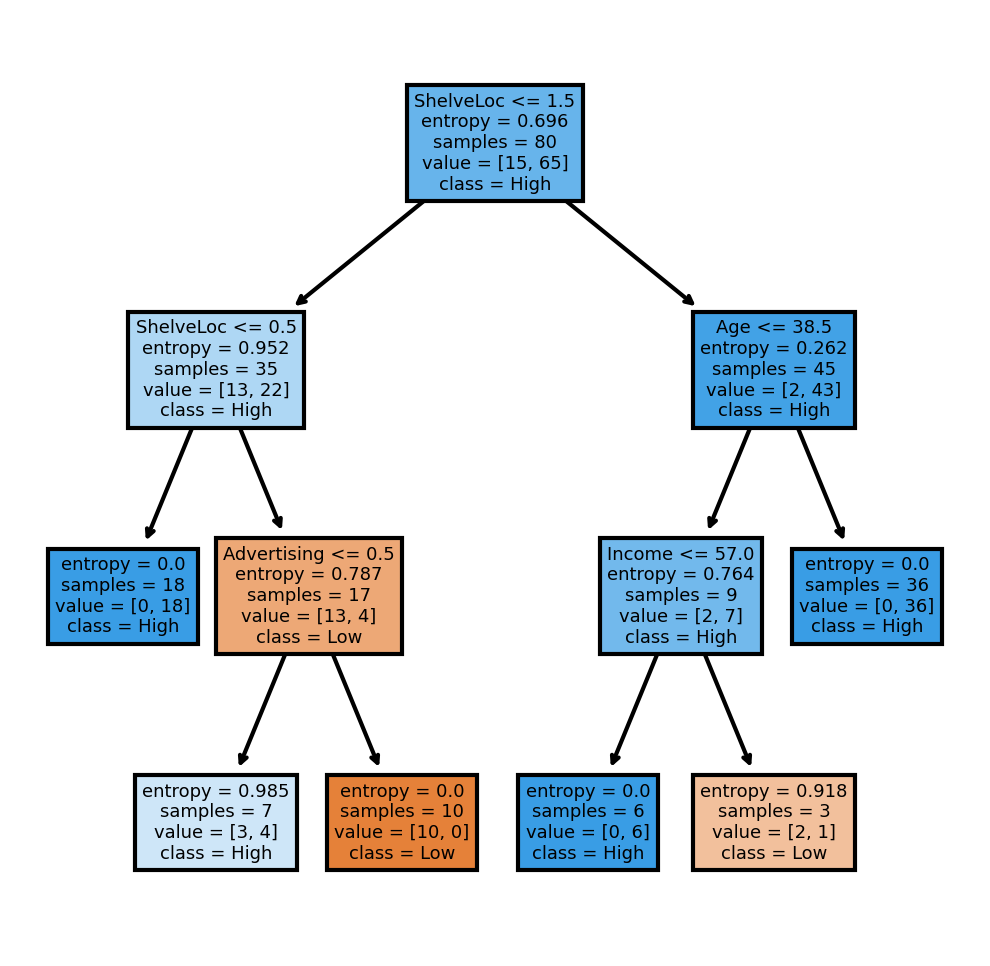

In [15]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    246
0     74
dtype: int64

In [17]:
preds 

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Y,,
0,37,27
1,37,219


In [19]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        64
           1       0.89      0.86      0.87       256

    accuracy                           0.80       320
   macro avg       0.70      0.72      0.70       320
weighted avg       0.81      0.80      0.81       320



In [20]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [21]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [22]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

[Text(153.45000000000002, 190.26, 'X[7] <= 10.5\ngini = 0.305\nsamples = 80\nvalue = [15, 65]'),
 Text(83.7, 135.9, 'X[6] <= 68.0\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(55.800000000000004, 81.53999999999999, 'X[5] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 1.5\ngini = 0.208\nsamples = 68\nvalue = [8, 60]'),
 Text(167.4, 81.53999999999999, 'X[5] <= 0.5\ngini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(139.5, 27.180000000000007, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(195.3, 27.180000000000007, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(279.0, 81.53999999999999, 'X[4] <= 95.5\ngini = 0.046\nsamples = 42\nvalue = [1, 41]'),
 Text(251.10000000000002

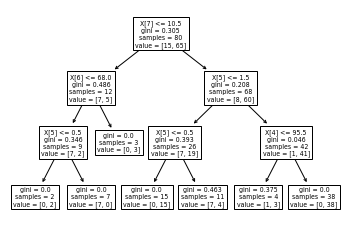

In [23]:
#PLot the decision tree
tree.plot_tree(model_gini)

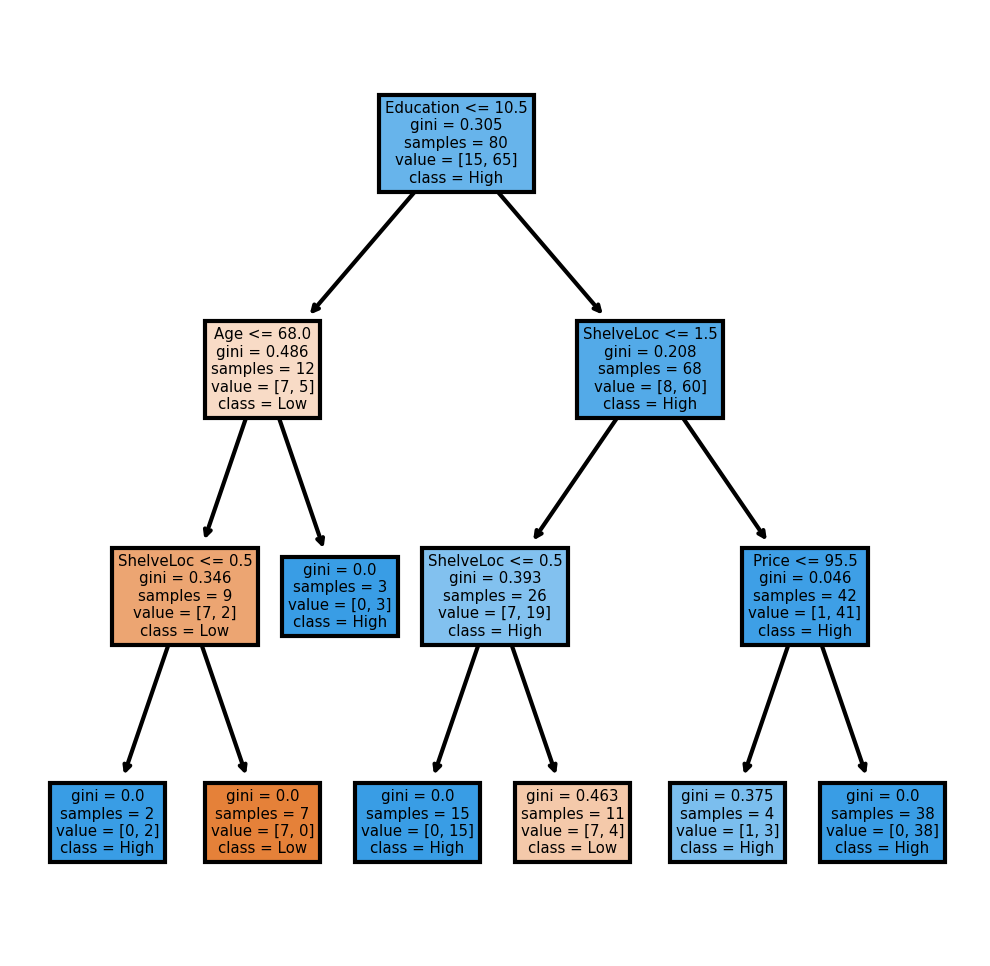

In [24]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [25]:
#Predicting on test data
preds_gini = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds_gini).value_counts() # getting the count of each category  

1    240
0     80
dtype: int64

In [26]:
pd.crosstab(y_test,preds_gini)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Y,,
0,37,27
1,43,213


In [27]:
#classification_report
print(classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51        64
           1       0.89      0.83      0.86       256

    accuracy                           0.78       320
   macro avg       0.68      0.71      0.69       320
weighted avg       0.80      0.78      0.79       320

